# Dhruv Rana
# Programming Exercise \#2
---

# Preamble

In [14]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [15]:
# import relevant Python libraries

import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [16]:
iot_df = pd.read_csv('iot_telemetry_dataset.csv')

### (a)

_Our objective is to detect if a human is near our device. Our dataset contains a motion variable that is boolean, which indicated wheter a motion was detected. This owuld make this a supervised machine learning task, as we have the dependent variable in the dataset_

### (b)

In [17]:
print("There are {0} data samples in the dataset".format(iot_df.shape[0]))

There are 405184 data samples in the dataset


### (c)



In [18]:
print("There are {0} device(s) that have MAC address 00:0f:00:70:91:0a".format(
    iot_df["device"].value_counts()["00:0f:00:70:91:0a"]))

print("{:.2f}% of the dataset has the MAC address 00:0f:00:70:91:0a".format(
    iot_df["device"].value_counts()["00:0f:00:70:91:0a"]/iot_df.shape[0]*100))


There are 111815 device(s) that have MAC address 00:0f:00:70:91:0a
27.60% of the dataset has the MAC address 00:0f:00:70:91:0a



### (d)

In [19]:
print("There are {0} device(s) that have MAC address 1c:bf:ce:15:ec:4d".format(
    iot_df["device"].value_counts()["1c:bf:ce:15:ec:4d"]))

print("{:.2f}% of the dataset has the MAC address 1c:bf:ce:15:ec:4d".format(
    iot_df["device"].value_counts()["1c:bf:ce:15:ec:4d"]/iot_df.shape[0]*100))


There are 105918 device(s) that have MAC address 1c:bf:ce:15:ec:4d
26.14% of the dataset has the MAC address 1c:bf:ce:15:ec:4d


### (e)

In [20]:
print("There are {0} device(s) that have MAC address b8:27:eb:bf:9d:51".format(
    iot_df["device"].value_counts()["b8:27:eb:bf:9d:51"]))

print("{:.2f}% of the dataset has the MAC address b8:27:eb:bf:9d:51".format(
    iot_df["device"].value_counts()["b8:27:eb:bf:9d:51"]/iot_df.shape[0]*100))


There are 187451 device(s) that have MAC address b8:27:eb:bf:9d:51
46.26% of the dataset has the MAC address b8:27:eb:bf:9d:51


## Problem 1.2

### (a)

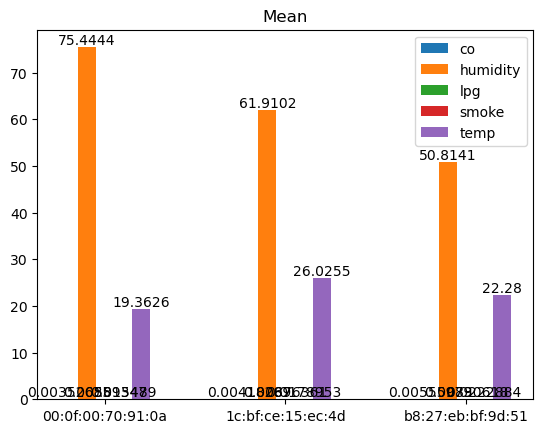

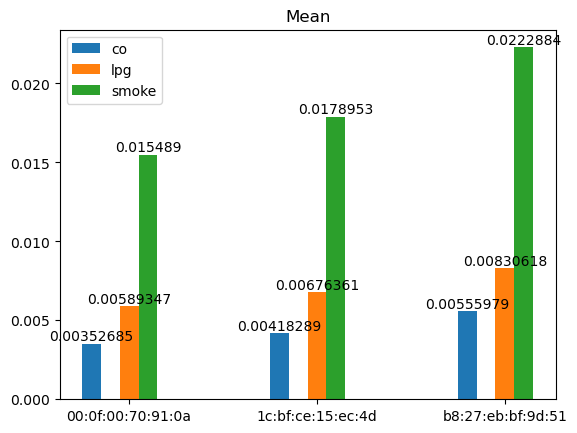

In [21]:
labels = ["00:0f:00:70:91:0a", "1c:bf:ce:15:ec:4d", "b8:27:eb:bf:9d:51"]

co_mean = [iot_df[iot_df["device"]==labels[0]]["co"].mean(), 
           iot_df[iot_df["device"]==labels[1]]["co"].mean(), 
           iot_df[iot_df["device"]==labels[2]]["co"].mean()]

humidity_mean = [iot_df[iot_df["device"]==labels[0]]["humidity"].mean(),
                 iot_df[iot_df["device"]==labels[1]]["humidity"].mean(),
                 iot_df[iot_df["device"]==labels[2]]["humidity"].mean()]

lpg_mean = [iot_df[iot_df["device"]==labels[0]]["lpg"].mean(),
            iot_df[iot_df["device"]==labels[1]]["lpg"].mean(),
            iot_df[iot_df["device"]==labels[2]]["lpg"].mean()]

smoke_mean = [iot_df[iot_df["device"]==labels[0]]["smoke"].mean(),
              iot_df[iot_df["device"]==labels[1]]["smoke"].mean(),
              iot_df[iot_df["device"]==labels[2]]["smoke"].mean()]

temp_mean = [iot_df[iot_df["device"]==labels[0]]["temp"].mean(),
             iot_df[iot_df["device"]==labels[1]]["temp"].mean(),
             iot_df[iot_df["device"]==labels[2]]["temp"].mean()]

x = np.arange(len(labels)) 
width = 0.1

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, co_mean, width, label='co')
rects2 = ax.bar(x - width, humidity_mean , width, label='humidity')
rects3 = ax.bar(x, lpg_mean , width, label='lpg')
rects4 = ax.bar(x + width, smoke_mean , width, label='smoke')
rects5 = ax.bar(x + 2*width, temp_mean , width, label='temp')

ax.set_title('Mean')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)
ax.bar_label(rects4)
ax.bar_label(rects5)

plt.show()

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, co_mean, width, label='co')
rects3 = ax.bar(x, lpg_mean , width, label='lpg')
rects4 = ax.bar(x + width, smoke_mean , width, label='smoke')

ax.set_title('Mean')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects3)
ax.bar_label(rects4)

plt.show()

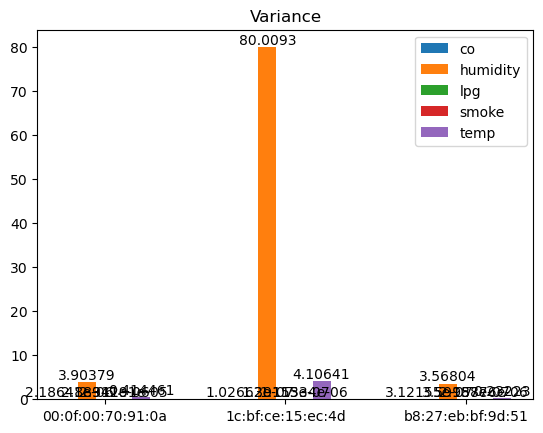

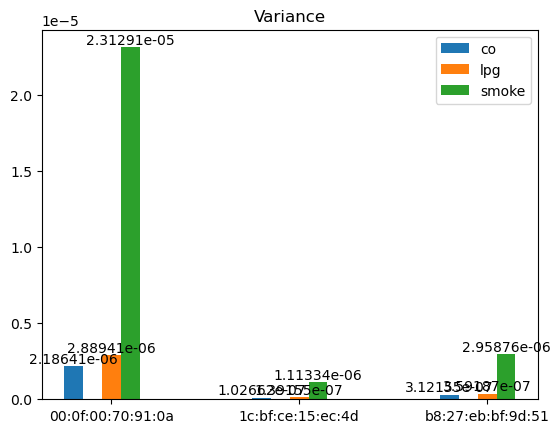

In [22]:
labels = ["00:0f:00:70:91:0a", "1c:bf:ce:15:ec:4d", "b8:27:eb:bf:9d:51"]

co_var = [iot_df[iot_df["device"]==labels[0]]["co"].var(), 
           iot_df[iot_df["device"]==labels[1]]["co"].var(), 
           iot_df[iot_df["device"]==labels[2]]["co"].var()]

humidity_var = [iot_df[iot_df["device"]==labels[0]]["humidity"].var(),
                 iot_df[iot_df["device"]==labels[1]]["humidity"].var(),
                 iot_df[iot_df["device"]==labels[2]]["humidity"].var()]

lpg_var = [iot_df[iot_df["device"]==labels[0]]["lpg"].var(),
            iot_df[iot_df["device"]==labels[1]]["lpg"].var(),
            iot_df[iot_df["device"]==labels[2]]["lpg"].var()]

smoke_var = [iot_df[iot_df["device"]==labels[0]]["smoke"].var(),
              iot_df[iot_df["device"]==labels[1]]["smoke"].var(),
              iot_df[iot_df["device"]==labels[2]]["smoke"].var()]

temp_var = [iot_df[iot_df["device"]==labels[0]]["temp"].var(),
             iot_df[iot_df["device"]==labels[1]]["temp"].var(),
             iot_df[iot_df["device"]==labels[2]]["temp"].var()]

x = np.arange(len(labels))
width = 0.1

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, co_var, width, label='co')
rects2 = ax.bar(x - width, humidity_var , width, label='humidity')
rects3 = ax.bar(x, lpg_var , width, label='lpg')
rects4 = ax.bar(x + width, smoke_var , width, label='smoke')
rects5 = ax.bar(x + 2*width, temp_var , width, label='temp')

ax.set_title('Variance')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)
ax.bar_label(rects4)
ax.bar_label(rects5)

plt.show()

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, co_var, width, label='co')
rects3 = ax.bar(x, lpg_var , width, label='lpg')
rects4 = ax.bar(x + width, smoke_var , width, label='smoke')

ax.set_title('Variance')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects3)
ax.bar_label(rects4)

plt.show()

_From the mean Bar chart we can tell that device 1 (00:0f:00:70:91:0a) is in a colder place than other devices and is also in the most humid place. On the other hand device 3 (b8:27:eb:bf:9d:51) is placed in the least humid place. Also, from the variance bar chart we can conclude that device 2 (1c:bf:ce:15:ec:4d) is placed in an enevironment where temp and humidity changes a lot compared to other devices indicated by high variance._

### (b)

In [23]:
devices  = ["00:0f:00:70:91:0a", "1c:bf:ce:15:ec:4d", "b8:27:eb:bf:9d:51"]

iot_df_copy = iot_df.copy() 

iot_df.loc[iot_df["device"] == devices[0] , ["co"]] = (iot_df[iot_df["device"] == devices[0]]["co"] - iot_df[iot_df["device"] == devices[0]]["co"].mean())/iot_df[iot_df["device"] == devices[0]]["co"].std()
iot_df.loc[iot_df["device"] == devices[0] , ["humidity"]] = (iot_df[iot_df["device"] == devices[0]]["humidity"] - iot_df[iot_df["device"] == devices[0]]["humidity"].mean())/iot_df[iot_df["device"] == devices[0]]["humidity"].std()
iot_df.loc[iot_df["device"] == devices[0] , ["lpg"]] = (iot_df[iot_df["device"] == devices[0]]["lpg"] - iot_df[iot_df["device"] == devices[0]]["lpg"].mean())/iot_df[iot_df["device"] == devices[0]]["lpg"].std()
iot_df.loc[iot_df["device"] == devices[0] , ["smoke"]] = (iot_df[iot_df["device"] == devices[0]]["smoke"] - iot_df[iot_df["device"] == devices[0]]["smoke"].mean())/iot_df[iot_df["device"] == devices[0]]["smoke"].std()
iot_df.loc[iot_df["device"] == devices[0] , ["temp"]] = (iot_df[iot_df["device"] == devices[0]]["temp"] - iot_df[iot_df["device"] == devices[0]]["temp"].mean())/iot_df[iot_df["device"] == devices[0]]["temp"].std()

iot_df.loc[iot_df["device"] == devices[1] , ["co"]] = (iot_df[iot_df["device"] == devices[1]]["co"] - iot_df[iot_df["device"] == devices[1]]["co"].mean())/iot_df[iot_df["device"] == devices[1]]["co"].std()
iot_df.loc[iot_df["device"] == devices[1] , ["humidity"]] = (iot_df[iot_df["device"] == devices[1]]["humidity"] - iot_df[iot_df["device"] == devices[1]]["humidity"].mean())/iot_df[iot_df["device"] == devices[1]]["humidity"].std()
iot_df.loc[iot_df["device"] == devices[1] , ["lpg"]] = (iot_df[iot_df["device"] == devices[1]]["lpg"] - iot_df[iot_df["device"] == devices[1]]["lpg"].mean())/iot_df[iot_df["device"] == devices[1]]["lpg"].std()
iot_df.loc[iot_df["device"] == devices[1] , ["smoke"]] = (iot_df[iot_df["device"] == devices[1]]["smoke"] - iot_df[iot_df["device"] == devices[1]]["smoke"].mean())/iot_df[iot_df["device"] == devices[1]]["smoke"].std()
iot_df.loc[iot_df["device"] == devices[1] , ["temp"]] = (iot_df[iot_df["device"] == devices[1]]["temp"] - iot_df[iot_df["device"] == devices[1]]["temp"].mean())/iot_df[iot_df["device"] == devices[1]]["temp"].std()

iot_df.loc[iot_df["device"] == devices[2] , ["co"]] = (iot_df[iot_df["device"] == devices[2]]["co"] - iot_df[iot_df["device"] == devices[2]]["co"].mean())/iot_df[iot_df["device"] == devices[2]]["co"].std()
iot_df.loc[iot_df["device"] == devices[2] , ["humidity"]] = (iot_df[iot_df["device"] == devices[2]]["humidity"] - iot_df[iot_df["device"] == devices[2]]["humidity"].mean())/iot_df[iot_df["device"] == devices[2]]["humidity"].std()
iot_df.loc[iot_df["device"] == devices[2] , ["lpg"]] = (iot_df[iot_df["device"] == devices[2]]["lpg"] - iot_df[iot_df["device"] == devices[2]]["lpg"].mean())/iot_df[iot_df["device"] == devices[2]]["lpg"].std()
iot_df.loc[iot_df["device"] == devices[2] , ["smoke"]] = (iot_df[iot_df["device"] == devices[2]]["smoke"] - iot_df[iot_df["device"] == devices[2]]["smoke"].mean())/iot_df[iot_df["device"] == devices[2]]["smoke"].std()
iot_df.loc[iot_df["device"] == devices[2] , ["temp"]] = (iot_df[iot_df["device"] == devices[2]]["temp"] - iot_df[iot_df["device"] == devices[2]]["temp"].mean())/iot_df[iot_df["device"] == devices[2]]["temp"].std()



### (c)

In [24]:
### Your code for 1.2(c) goes here ###
iot_df = pd.get_dummies(iot_df,columns= ['light','motion'])

### (d)

In [25]:
iot_df.head(20)

,ts,device,co,humidity,lpg,smoke,temp,light_False,light_True,motion_False,motion_True
0,1.594512e+09,b8:27:eb:bf:9d:51,-1.080793,0.098428,-1.093491,-1.091260,0.871610,1,0,1,0
1,1.594512e+09,00:0f:00:70:91:0a,-0.464451,0.281222,-0.458333,-0.460392,0.524162,1,0,1,0
2,1.594512e+09,b8:27:eb:bf:9d:51,-1.044864,0.045488,-1.056107,-1.054137,0.664099,1,0,1,0
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.687051,1.664629,0.696248,0.694633,0.480890,0,1,1,0
4,1.594512e+09,b8:27:eb:bf:9d:51,-1.060344,0.045488,-1.072209,-1.070127,0.664099,1,0,1,0
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.649527,1.787605,0.659043,0.657370,0.480890,0,1,1,0
6,1.594512e+09,b8:27:eb:bf:9d:51,-1.044841,0.045488,-1.056083,-1.054113,0.664099,1,0,1,0
7,1.594512e+09,00:0f:00:70:91:0a,-0.398156,0.281222,-0.383561,-0.387058,0.524162,1,0,1,0
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.507419,1.787605,0.517887,0.516039,0.480890,0,1,1,0
9,1.594512e+09,b8:27:eb:bf:9d:51,-1.055167,0.045488,-1.066824,-1.064779,0.664099,1,0,1,0


### (e)

_the feature ts is the time the device recorded the sample. Any chnages to it will greatly change our results. Thus we never touch the ts feature._

## Problem 1.3

In [26]:
### Your code for 1.3 goes here ###
feature_mean = iot_df_copy.loc[:,["co","humidity","lpg","smoke","temp"]].mean(axis=1)
feature_gmean = sps.gmean(iot_df_copy.loc[:,["co","humidity","lpg","smoke","temp"]],axis=1)
feature_hmean = sps.hmean(iot_df_copy.loc[:,["co","humidity","lpg","smoke","temp"]],axis=1)
feature_var = iot_df_copy.loc[:,["co","humidity","lpg","smoke","temp"]].var(axis=1)
feature_kurtosis = sps.kurtosis(iot_df_copy.loc[:,["co","humidity","lpg","smoke","temp"]],axis=1)
feature_skew = sps.skew(iot_df_copy.loc[:,["co","humidity","lpg","smoke","temp"]],axis=1)

d = {'mean':feature_mean,'gmean':feature_gmean,'hmean':feature_hmean,'variance':feature_var,'kurtosis':feature_kurtosis,'skew':feature_skew}
iot_handCrafted_df = pd.DataFrame(data=d)

iot_handCrafted_df.head(40)

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


,mean,gmean,hmean,variance,kurtosis,skew
0,14.746604,0.245731,0.013105,507.244728,-0.725326,0.943233
1,19.144246,0.195924,0.008025,1082.894866,-0.108093,1.276663
2,14.706625,0.245914,0.013151,505.036607,-0.721394,0.945249
3,20.766012,0.260278,0.011814,1117.776178,-0.394623,1.117057
4,14.706616,0.245700,0.013131,505.036943,-0.721394,0.945249
5,20.985998,0.260664,0.011786,1148.837513,-0.377846,1.126135
6,14.706625,0.245914,0.013151,505.036606,-0.721394,0.945249
7,19.144362,0.199271,0.008270,1082.889338,-0.108088,1.276666
8,20.985949,0.259311,0.011678,1148.840107,-0.377849,1.126134
9,14.706619,0.245771,0.013138,505.036831,-0.721394,0.945249


# **2. Feature Learning for _Synthetically Generated Data_**

## Problem 2.1

### (a)

In [27]:
B = np.random.randn(3,2)
print(B)

[[ 0.38013811 -1.37458072]
 [ 1.62949143  1.23918059]
 [ 1.66160545  1.19305931]]


### (b)

In [28]:
print("The rank of matrix B is : {0}".format(np.linalg.matrix_rank(B)))

The rank of matrix B is : 2


### (c)



In [29]:
print("The norm of the first vector is : {0}".format(np.linalg.norm(B,axis=0)[0]))
print("The norm of the second vector is : {0}".format(np.linalg.norm(B,axis=0)[1]))

print("\nThe inner product of the two vectors is :{0}".format(np.linalg.multi_dot([B[:,0],B[:,1]])))

The norm of the first vector is : 2.358109407925489
The norm of the second vector is : 2.201915345207981

The inner product of the two vectors is :3.479097476669758


### (d)

In [30]:
v1 = B[:,0] + B[:,1]
v2 = B[:,0] + 2*B[:,1]
v3 = 2*B[:,0] + B[:,1]

print("Three unique vectors that lie in the column space of B are : {0}.T,{1}.T,{2}.T".format(v1,v2,v3))

Three unique vectors that lie in the column space of B are : [-0.9944426   2.86867202  2.85466476].T,[-2.36902332  4.1078526   4.04772407].T,[-0.61430449  4.49816345  4.51627021].T


## Problem 2.2

### (a)

In [31]:
x_i = np.zeros((200,3))


for i in range (200):
    v = np.random.randn(2,1)
    x = np.matmul(B,v)
    x_i[i,0] = x[0]
    x_i[i,1] = x[1]
    x_i[i,2] = x[2]

# x_i rows contain the values for x_i for given i

### (b)

_[Your answer for 2.2(b) goes here]_

### (c)

In [32]:
X = x_i
print("# of rows of X : {0} \n# of columns of X : {1}".format(np.shape(X)[0],np.shape(X)[1]))

# of rows of X : 200 
# of columns of X : 3


_n = # of data sample = 200 \
p = # of feature = 3_

### (d)

In [33]:
print("The rank of the matrix X is : {0}".format(np.linalg.matrix_rank(X)))

The rank of the matrix X is : 2


## Problem 2.3

  ### (a)

In [34]:
U,sigma,V_t = np.linalg.svd(X)
eig_val,eig_vect = np.linalg.eig(np.matmul(X.T,X))

idx = eig_val.argsort()[::-1]   
eig_val = eig_val[idx]
eig_vect = eig_vect[:,idx]

print("Right Singular Matrix :-")
print(V_t.T)
print("EigenVectors Matrix :-")
print(eig_vect)

print("\nEignevalues :-")
print(eig_val)
print("Singular Values :-")
print(sigma)
print("Singular Values (squared):-")
print(np.square(sigma))

print("\nEnergy of matrix X : {0}".format(np.linalg.norm(X)**2))
print("sum of singular values : {0}".format(sum(np.square(sigma))))


Right Singular Matrix :-
[[ 0.13750884 -0.99005147  0.02982282]
 [-0.69986978 -0.07581126  0.71023583]
 [-0.70090913 -0.1185358  -0.70333183]]
EigenVectors Matrix :-
[[ 0.13750884 -0.99005147 -0.02982282]
 [-0.69986978 -0.07581126 -0.71023583]
 [-0.70090913 -0.1185358   0.70333183]]

Eignevalues :-
[2.01919384e+03 3.85578049e+02 2.19146875e-13]
Singular Values :-
[4.49354408e+01 1.96361414e+01 3.30431623e-15]
Singular Values (squared):-
[2.01919384e+03 3.85578049e+02 1.09185058e-29]

Energy of matrix X : 2404.771887872834
sum of singular values : 2404.771887872834


_The eigenvectors and right singular matrix differ by a sign sometimes (this is acceptable).\
The last value of singular value and eignevlaue do not match exactly as they are so small._

### (b)

_The right singular vector hold the basis for row space in the first r (rank of matrix) vectors, which is transpose of coulmn space (subspace S). The singular vector from V also represent the spatial distribution whose amplitude is related to the corresponding singular value._

## Problem 2.4

### (a)

_Even tough our data samples lies on three-dimensional subspace. We know from above that the data is syntethic which actually lies on two-dimensional subspace. Thus we can get away by getting two principal components, whihc will capture most of the enrgy from the data._

### (b)

_E[X] = E[Bv] = B E[v] = B*0 = 0 (B is constant and never cahnges for all of xi and the mean of v is 0 beacuse it is a normal gaussian distribution)_

In [35]:
print("\nThe mean of the data :-")
print(np.mean(X,axis=0))


The mean of the data :-
[ 0.01894701 -0.32510024 -0.32748808]


_The mean is small but not exactly zero._

### (c)

In [36]:
U_PCA = V_t.T[:,0:2]
print("The first two principal component directions are first two columns of right singular matrix:-")
print(U_PCA)

The first two principal component directions are first two columns of right singular matrix:-
[[ 0.13750884 -0.99005147]
 [-0.69986978 -0.07581126]
 [-0.70090913 -0.1185358 ]]


### (d)

In [37]:
A = U_PCA.T
X_f = np.matmul(x_i,A.T)

### (e)

In [38]:
X_hat  = np.matmul(X_f,A)

### (f)

In [39]:
proj_error = np.linalg.norm(X_hat-X)**2
print("The projection error is : {0}".format(proj_error))

The projection error is : 6.388079295642878e-29


### (g)

In [40]:
U_1_PCA = U_PCA[:,0:1]
A_1 = U_1_PCA.T
X_1_f = np.matmul(x_i,A_1.T)

### (h)

In [41]:
X_1_hat  = np.matmul(X_1_f,A_1)

### (i)

In [42]:
proj_error = np.linalg.norm(X_1_hat-X)**2
print("The projection error is : {0}".format(proj_error))
print("The square of thesecond-largest singular value is : {0}".format(sigma[1]*sigma[1]))

The projection error is : 385.57804944216247
The square of thesecond-largest singular value is : 385.5780494421622


### (j)

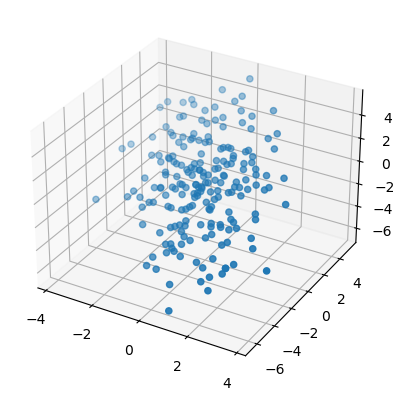

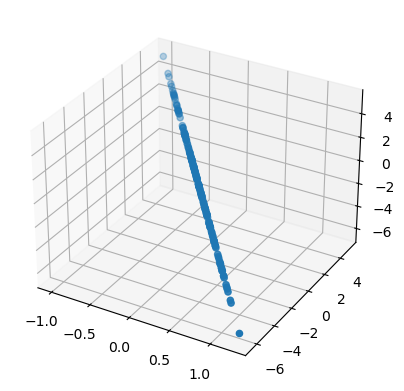

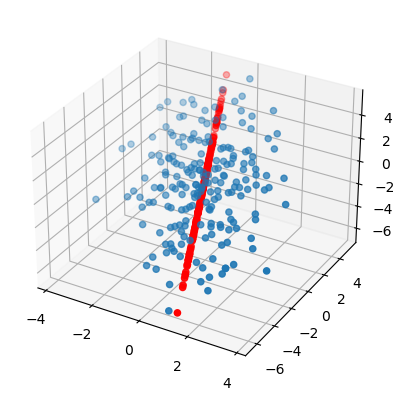

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X_1_hat[:,0],X_1_hat[:,1],X_1_hat[:,2])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])
ax.scatter(X_1_hat[:,0],X_1_hat[:,1],X_1_hat[:,2],c="red")

_Since we are using only one PCA component all of data is projected in to k =  1 subspace, which is a line. Thus we see htat all of our projected data is in one line._

### (j trial with 2) ####

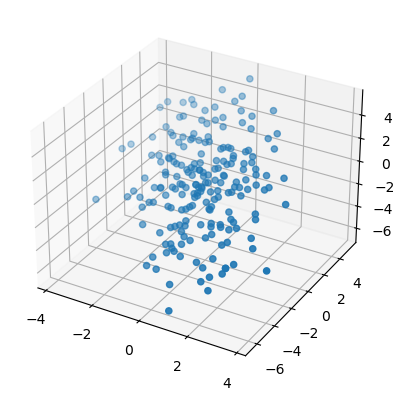

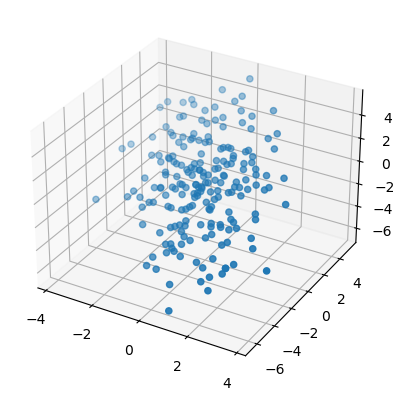

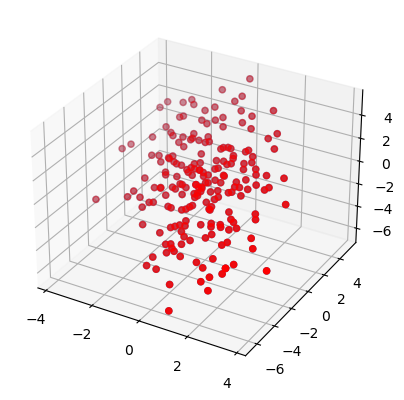

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X_hat[:,0],X_hat[:,1],X_hat[:,2])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])
ax.scatter(X_hat[:,0],X_hat[:,1],X_hat[:,2],c="red")

_Using two PCA results in better data projection with minimum projection error._